Importando Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

Importando Dataset

In [9]:
#IMPORTANDO VARIÁVEIS
dataset = pd.read_csv('C:/Users/Bruno/PycharmProjects/untitled1/_Kaggle/blackfriday/BlackFriday.csv')
purchase = dataset['Purchase']

Tratamento dos Dados

In [10]:
#CATEGORIA DE CADA PRODUTO
dataset_categorical = dataset[['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Purchase']].copy()

#PREENCHENDO NULOS DA COLUNA CATEGORIA 2
produto2_random = pd.DataFrame(dataset_categorical['Product_Category_2'].value_counts(1))
produto2_random = produto2_random.reset_index()
dataset_categorical['Product_Category_2'].fillna(np.random.choice(produto2_random.index, p=produto2_random.Product_Category_2), inplace=True)
dataset_categorical['Product_Category_2'] = (dataset_categorical['Product_Category_2']).astype(int)



#LABEL ENCODER
labelencoder1 = LabelEncoder()
dataset['Gender'] = labelencoder1.fit_transform(dataset['Gender'])

labelencoder2 = LabelEncoder()
dataset['Age'] = labelencoder2.fit_transform(dataset['Age'])

labelencoder3 = LabelEncoder()
dataset['Occupation'] = labelencoder3.fit_transform(dataset['Occupation'])

labelencoder4 = LabelEncoder()
dataset['City_Category'] = labelencoder4.fit_transform(dataset['City_Category'])

labelencoder5 = LabelEncoder()
dataset['Stay_In_Current_City_Years'] = labelencoder5.fit_transform(dataset['Stay_In_Current_City_Years'])

labelencoder6 = LabelEncoder()
dataset['Marital_Status'] = labelencoder6.fit_transform(dataset['Marital_Status'])

#AGRUPANDO DATASET
dataset_easy = dataset.groupby('User_ID', as_index=False)['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'].mean()

dataset_easy['Gender'] = labelencoder1.inverse_transform(dataset_easy['Gender'].astype(int))
dataset_easy['Age'] = labelencoder2.inverse_transform(dataset_easy['Age'].astype(int))
dataset_easy['Occupation'] = labelencoder3.inverse_transform(dataset_easy['Occupation'].astype(int))
dataset_easy['City_Category'] = labelencoder4.inverse_transform(dataset_easy['City_Category'].astype(int))
dataset_easy['Stay_In_Current_City_Years'] = labelencoder5.inverse_transform(dataset_easy['Stay_In_Current_City_Years'].astype(int))
dataset_easy['Marital_Status'] = labelencoder6.inverse_transform(dataset_easy['Marital_Status'].astype(int))

#SETANDO DADOS DA VARIÁVEL MARITAL_STATUS COMO BOOLEAN
dataset_easy['Marital_Status'] = dataset_easy['Marital_Status'].astype(bool)

In [18]:
#CATEGORIA DE PRODUTOS
def cat_produtos():
    prod1 = dataset_categorical['Product_Category_1'].value_counts()
    prod2 = dataset_categorical['Product_Category_2'].value_counts()

    prods = pd.DataFrame({'Cat Produto 1': prod1, 'Cat Produto 2':prod2})
    prods.plot.bar()
    plt.title('Contagem por categorias de produtos')
    plt.show()

#COMPRA_IDADE_GÊNERO
def compra_idade_genero():
    sns.barplot(dataset_easy['Age'], dataset_easy['Purchase'], hue=dataset_easy['Gender'], order=sorted(dataset_easy['Age'].unique()))
    plt.show()

#DESCRIÇÃO DAS VARIÁVEIS
def descricao():
    colunas = dataset_easy.columns
    dataset_describe = dataset_easy.copy()
    dataset_describe.columns = range(len(dataset_describe.columns))

    for i in range(len(dataset_describe.columns)):
        if(dataset_describe[i].describe().dtype=='object'):
            print('---',str.upper(str(colunas[i])),'---\n')
            print(dataset_describe[i].describe())
            print('Valores em porcento: \n', dataset_describe[i].value_counts(2))

#BOXPOLOT CIDADE X GÊNERO X PURCHASE
def boxplot_cidade_genero():
    sns.boxplot(dataset_easy['City_Category'], dataset_easy['Purchase'], hue=dataset_easy['Gender'], order=sorted(dataset_easy['City_Category'].unique()))
    plt.show()

#HISTOGRAMA ENTRE HOMENS E MULHERES
def histograma_homens_e_mulheres():
    homem_compra = dataset_easy['Purchase'][dataset_easy['Gender']=='M']
    mulher_compra = dataset_easy['Purchase'][dataset_easy['Gender']=='F']
    #homem_compra = np.log(homem_compra)
    #mulher_compra = np.log(mulher_compra)

    print('Curtose - Homem', round(homem_compra.kurtosis(), 2))
    print('Curtose - Mulher', round(mulher_compra.kurtosis(), 2))

    print('homens somatório', round(homem_compra.sum(), 2))
    print('mulher somatório',round( mulher_compra.sum(), 2))

    print('homens contagem', len(homem_compra))
    print('mulher contagem', len(mulher_compra))

    print('Comparação entre homens e mulheres - Número das compras', round(len(homem_compra)/(len(homem_compra)+len(mulher_compra)), 3))
    print('Comparação entre homens e mulheres - Valor de compras', round(homem_compra.sum() / (homem_compra.sum() + mulher_compra.sum()), 3))

    sns.distplot(homem_compra, label='Homem')
    sns.distplot(mulher_compra, label='Mulher')
    plt.legend()
    plt.show()

#HISTOGRAMA ENTRE CASADOS E NÃO CASADOS
def histograma_casados():
    casado = dataset_easy['Purchase'][dataset_easy['Marital_Status']==True]
    nao_casado = dataset_easy['Purchase'][dataset_easy['Marital_Status']==False]
    #homem_compra = np.log(homem_compra)
    #mulher_compra = np.log(mulher_compra)

    print('Curtose - Homem', casado.kurtosis())
    print('Curtose - Mulher', nao_casado.kurtosis())

    print('homens somatório', casado.sum())
    print('mulher somatório', nao_casado.sum())

    print('homens contagem', len(casado))
    print('mulher contagem', len(nao_casado))

    print('Comparação entre homens e mulheres - Número das compras', round(len(casado)/(len(casado)+len(nao_casado)), 3))
    print('Comparação entre homens e mulheres - Valor de compras', round(casado.sum() / (casado.sum() + nao_casado.sum()), 3))

    sns.distplot(casado, label='Casado')
    sns.distplot(nao_casado, label='Não-Casado')
    plt.legend()
    plt.show()

In [20]:
descricao()

--- GENDER ---

count     5891
unique       2
top          M
freq      4225
Name: 1, dtype: object
Valores em porcento: 
 M    0.717196
F    0.282804
Name: 1, dtype: float64
--- AGE ---

count      5891
unique        7
top       26-35
freq       2053
Name: 2, dtype: object
Valores em porcento: 
 26-35    0.348498
36-45    0.198099
18-25    0.181463
46-50    0.090137
51-55    0.081650
55+      0.063147
0-17     0.037006
Name: 2, dtype: float64
--- CITY_CATEGORY ---

count     5891
unique       3
top          C
freq      3139
Name: 4, dtype: object
Valores em porcento: 
 C    0.532847
B    0.289764
A    0.177389
Name: 4, dtype: float64
--- STAY_IN_CURRENT_CITY_YEARS ---

count     5891
unique       5
top          1
freq      2086
Name: 5, dtype: object
Valores em porcento: 
 1     0.354099
2     0.194364
3     0.166186
4+    0.154303
0     0.131047
Name: 5, dtype: float64
--- MARITAL_STATUS ---

count      5891
unique        2
top       False
freq       3417
Name: 6, dtype: object
Valore

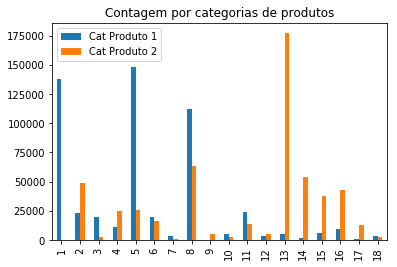

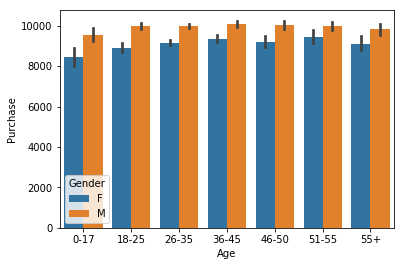

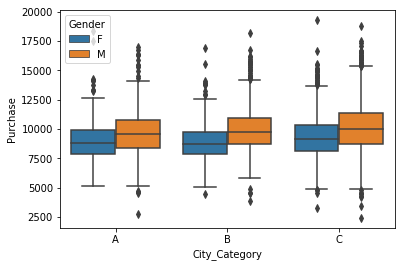

Curtose - Homem 0.71
Curtose - Mulher 2.32
homens somatório 42184854.29
mulher somatório 15246968.97
homens contagem 4225
mulher contagem 1666
Comparação entre homens e mulheres - Número das compras 0.717
Comparação entre homens e mulheres - Valor de compras 0.735


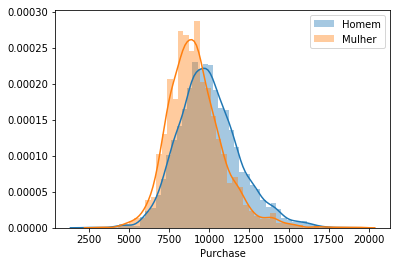

Curtose - Homem 0.8757963603445726
Curtose - Mulher 0.9349901725162519
homens somatório 24133847.510857876
mulher somatório 33297975.75034273
homens contagem 2474
mulher contagem 3417
Comparação entre homens e mulheres - Número das compras 0.42
Comparação entre homens e mulheres - Valor de compras 0.42


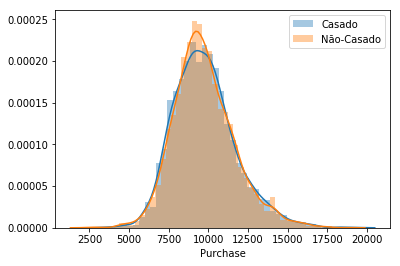

In [21]:
cat_produtos()
compra_idade_genero()
boxplot_cidade_genero()
histograma_homens_e_mulheres()
histograma_casados()

In [1]:
dataset_easy['Occupation']

NameError: name 'dataset_easy' is not defined